In [2]:
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv'

# csv_path = 'PATH NAME HERE'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

from math import sqrt
from random import seed
from random import randrange

%matplotlib inline

In [3]:

df = pd.read_csv(csv_path)
np.random.shuffle(df.values)

In [4]:
def downsampling(X_train, y_train):
  min_class_count = y_train.value_counts().min()
  class_groups = [y_train[y_train == c] for c in y.unique()]
  downsampled_classes = [group.sample(n=min_class_count, random_state=42)
                          for group in class_groups]
  y_train = pd.concat(downsampled_classes)
  X_train = X.loc[pd.concat(downsampled_classes).index]

  return X_train, y_train;

In [5]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, y_train = downsampling(X_train, y_train)
X_train = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)

In [7]:
for i in np.unique(y_train):
    print("class %d - samples: %d" % (i, np.sum(y_train == i)))

class 0 - samples: 3960
class 1 - samples: 3960
class 2 - samples: 3960


###### Model

In [8]:
# Kernel Function
def gaussian(x, sigma):
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x / sigma) ** 2)

# Pattern Layer
def pattern_layer(inp, X_train, kernel, sigma):
    k_values = []
    for p in X_train.values:
        edis = np.linalg.norm(p - inp)
        k = kernel(edis, sigma)
        k_values.append(k)
    return np.array(k_values)

# Summation Layer
def summation_layer(k_values, Y_train, class_counts):
    summed = np.zeros(len(class_counts))
    for i, c in enumerate(class_counts.index):
        val = (Y_train == c).values
        summed[i] = np.sum(k_values[val])
    avg_sum = summed / class_counts.values
    return avg_sum

# Output Layer
def classify(inp, X_train, Y_train, kernel, sigma, class_labels):
    class_counts = Y_train.value_counts()
    k_values = pattern_layer(inp, X_train, kernel, sigma)
    avg_sums = summation_layer(k_values, Y_train, class_counts)
    return class_labels[np.argmax(avg_sums)]

Accuracy: 0.8419268369599495
F1 Score: 0.7696731320374354


Text(0.5, 1.0, 'Confusion Matrix')

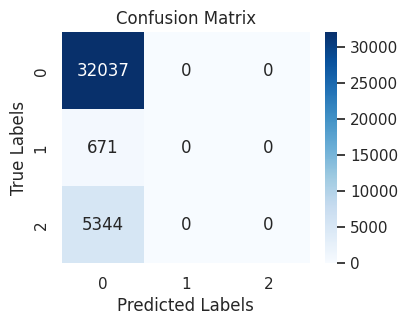

In [9]:
sigma = 0.001
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.8419268369599495
F1 Score: 0.7696731320374354


Text(0.5, 1.0, 'Confusion Matrix')

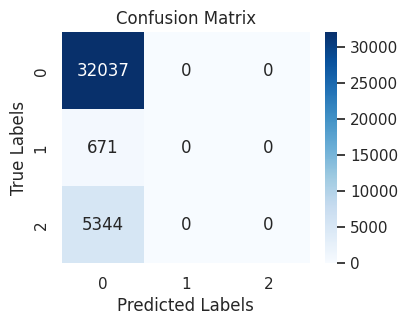

In [10]:
sigma = 0.1
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.8419268369599495
F1 Score: 0.7696731320374354


Text(0.5, 1.0, 'Confusion Matrix')

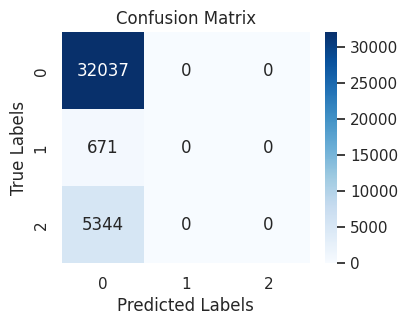

In [11]:
sigma = 0.2
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.8419268369599495
F1 Score: 0.7696731320374354


Text(0.5, 1.0, 'Confusion Matrix')

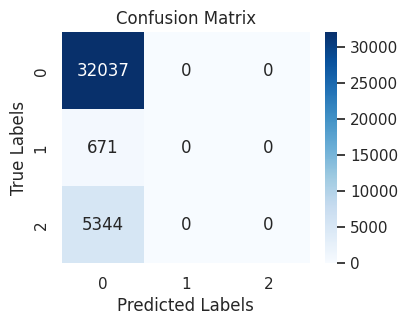

In [12]:
sigma = 0.3
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.8419005571323452
F1 Score: 0.7696600887127308


Text(0.5, 1.0, 'Confusion Matrix')

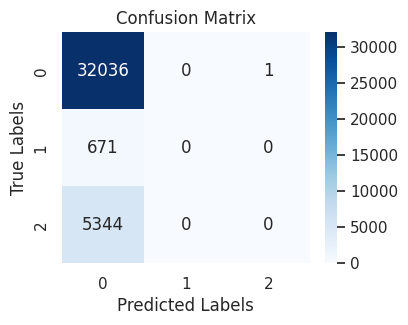

In [13]:
sigma = 0.4
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.8405865657521286
F1 Score: 0.7690574087505923


Text(0.5, 1.0, 'Confusion Matrix')

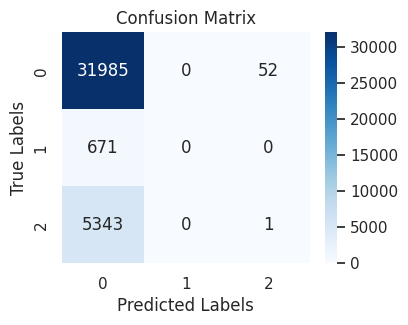

In [14]:
sigma = 0.5
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.8300220750551877
F1 Score: 0.7647721044574957


Text(0.5, 1.0, 'Confusion Matrix')

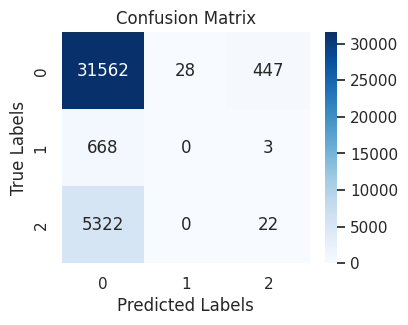

In [15]:
sigma = 0.6
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.8123883107326816
F1 Score: 0.758351555559318


Text(0.5, 1.0, 'Confusion Matrix')

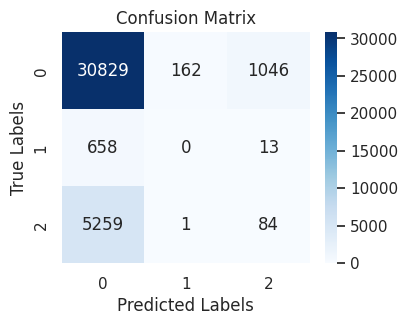

In [16]:
sigma = 0.7
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.793755912961211
F1 Score: 0.7515605213460869


Text(0.5, 1.0, 'Confusion Matrix')

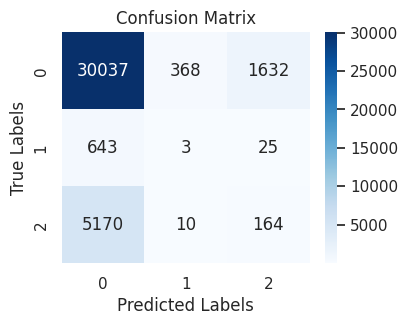

In [17]:
sigma = 0.8
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.7815095132975928
F1 Score: 0.7483307540066806


Text(0.5, 1.0, 'Confusion Matrix')

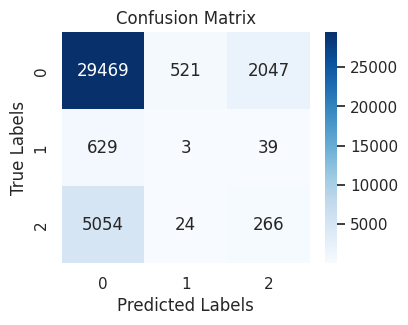

In [18]:
sigma = 0.9
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Accuracy: 0.7661358141490592
F1 Score: 0.7441294671798363


Text(0.5, 1.0, 'Confusion Matrix')

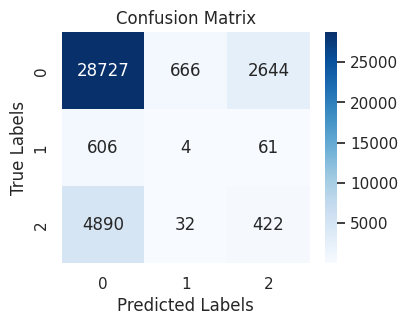

In [19]:
sigma = 1.0
kernel = gaussian
class_labels = y_train.unique()

predictions = []
for inp in X_test.values:
    predictions.append(classify(inp, X_train, y_train, kernel, sigma, class_labels))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")